In [76]:
import pandas as pd
import numpy as np
import re 
import requests 
import matplotlib 
import seaborn as sns
from bs4 import BeautifulSoup 
from pandasql import sqldf
%matplotlib inline
import sqlite3
from fractions import Fraction

In [2]:
#CSV files
dfcsv_1 = pd.read_csv('dsc-phase-1-project-online/zippedData/bom.movie_gross.csv.gz')
dfcsv_2 = pd.read_csv('dsc-phase-1-project-online/zippedData/imdb.name.basics.csv.gz')
dfcsv_3 = pd.read_csv('dsc-phase-1-project-online/zippedData/imdb.title.akas.csv.gz')
dfcsv_4 = pd.read_csv('dsc-phase-1-project-online/zippedData/imdb.title.basics.csv.gz')
dfcsv_5 = pd.read_csv('dsc-phase-1-project-online/zippedData/imdb.title.crew.csv.gz')
dfcsv_6 = pd.read_csv('dsc-phase-1-project-online/zippedData/imdb.title.principals.csv.gz')
dfcsv_7 = pd.read_csv('dsc-phase-1-project-online/zippedData/imdb.title.ratings.csv.gz')

In [3]:
#TSV FILES
dftsv_1= pd.read_csv('dsc-phase-1-project-online/zippedData/rt.movie_info.tsv.gz', delimiter='\t',encoding='utf-8')
dftsv_2 = pd.read_csv('dsc-phase-1-project-online/zippedData/rt.reviews.tsv.gz', delimiter='\t',encoding='unicode_escape')
dftsv_3 = pd.read_csv('dsc-phase-1-project-online/zippedData/tmdb.movies.csv.gz',delimiter='\t',encoding='unicode_escape')

In [ ]:
#dfcsv_1 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
#dfcsv_2 Index(['nconst', 'primary_name', 'birth_year', 'death_year', 'primary_profession', 'known_for_titles'], dtype='object')
#dfcsv_3 Index(['title_id', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title'], dtype='object')
#dfcsv_4 Index(['tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres'], dtype='object')
#dfcsv_5 Index(['tconst', 'directors', 'writers'], dtype='object')
#dfcsv_6 Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object')
#dfcsv_7 Index(['tconst', 'averagerating', 'numvotes'], dtype='object')
#dfcsv_1 Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio'], dtype='object')
#dftsv_2 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date'], dtype='object')

In [136]:
dftsv_1['rating'].rename('parent_rating')

clean1 = dfcsv_1.drop(labels='foreign_gross', axis=1).fillna(dfcsv_1['domestic_gross'].median())
clean2 = dfcsv_2.drop(labels='birth_year', axis=1).drop(labels='death_year', axis=1).fillna('unknown')
clean3 = dfcsv_3.drop(labels='attributes', axis=1).drop(labels='language', axis=1).drop(labels='types', axis=1).fillna('unknown')
clean4 = dfcsv_4.fillna(dfcsv_4['runtime_minutes'].median()).fillna('unknown')
clean5 = dfcsv_5.fillna('unknown')
clean6 = dfcsv_6.drop(labels='job', axis=1).drop(labels='characters', axis=1)
clean7 = dfcsv_7
clean8 = dftsv_1 #Really short but lots of data, join on left & right in sep DF w\clean1 
clean9 = dftsv_2
clean10 = dftsv_3 


In [198]:
#c1 = clean1.groupby(['studio', 'title']).mean()
#c1
#dftsv_2['rating_percent'] = [for rating in dftsv_2(): ]
#print(clean9.isna().sum())

grad_scale = {'A+' : 100, 'A' : 100, 'A-' : 90, 'B+' : 87, 'B' : 83, 'B-' : 80, 
              'C+' : 77, 'C' : 73 , 'C-' : 70, 'D+' : 67, 'D' : 63, 'D-' : 60, 'F' : 0, 
              '3/5' : 60, '2/4' : 50, '40' : 40, '2.7/4': 67, '2/5': 40, '3/4' : 75, '4/5': 80, '4/4': 100,
              '6/10': 60, '5/10': 50, '4/10': 40, '3/10': 30, '2/10': 20, '1/10': 10, '7/10': 70, '8/10': 80,
              '9/10': 90, '10/10': 100, '0/10': 0, '1/4': 25 , '2.5/4': 62, '2.0/5' : 40, '3.0/5' : 60,
              '4.0/5' : 80, '5.0/5' : 100, '1.0/5' : 20, '3.7/4' : '92', '2.7/4' : '67', '1.7/4' : '42', '.7/4' : '17',
              '5/5' : '100', '3.5/4' : '87', '2.5/4' : '62', '1.5/4' : '37', '.5/4' : '12', '1.3/4' : '32', '1.3/4' : '32', 
              '2.3/4' : '57', '1.3/4' : '32', '3.3/4' : '82', '.5/5' : '10', '1.5/5' : '30', '3.5/5' : '70', '4.5/5' : '90',
              '2.5/5' : '50', '1.5/10' : '15', '2.5/10' : '25', '3.5/10' : '35', '4.5/10' : '55', '5.5/10' : '55',
              '5.5/10' : '55', '6.5/10' : '65', '7.5/10' : '75', '8.5/10' : '85', '9.5/10' : '95', '1/5' : '20',
              '0/5' : '0', '0.5/4' : '12', '3.1/5' : '62', '3/6':'.5' , '0/4' : '0'}

c = dftsv_2['rating'].replace(grad_scale).dropna().astype(float)
c.mean()

#float(sum(Fraction(s) for s in clean9['rating']))

ValueError: could not convert string to float: '4.0/4'

In [165]:
3/4

0.75

In [17]:
#print(dfcsv_5.median())
#print(dfcsv_5.notna().sum())
print(dfcsv_6.isna().sum())
dfcsv_6

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [92]:
cleanup1 = clean1.merge(clean3, on='title').fillna('unknown')
cleanup2 = 

,title,studio,domestic_gross,year,title_id,ordering,region,is_original_title
0,Toy Story 3,BV,415000000.0,2010,tt0435761,15,DK,0
1,Toy Story 3,BV,415000000.0,2010,tt0435761,20,UY,0
2,Toy Story 3,BV,415000000.0,2010,tt0435761,21,JP,0
3,Toy Story 3,BV,415000000.0,2010,tt0435761,22,ES,0
4,Toy Story 3,BV,415000000.0,2010,tt0435761,27,unknown,1
...,...,...,...,...,...,...,...,...
10904,El Pacto,Sony,2500.0,2018,tt2040560,8,AR,0
10905,The Swan,Synergetic,2400.0,2018,tt5764816,1,unknown,0
10906,The Swan,Synergetic,2400.0,2018,tt5764816,4,SE,0
10907,An Actor Prepares,Grav.,1700.0,2018,tt5718046,1,unknown,1


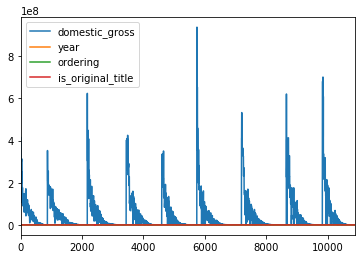

In [17]:
dfl = cleanup1.drop(labels='attributes', axis=1).drop(labels='language', axis=1).drop(labels='types', axis=1)
dfl.plot()

In [38]:
dfm = dff.drop(labels='job', axis=1).drop(labels='characters', axis=1)
cleanup2 = dfl.join(dfm, on='ordering', how='left', lsuffix='1')
cleanup2.head()


,title,studio,domestic_gross,foreign_gross,year,title_id,ordering1,region,is_original_title,tconst,ordering,nconst,category
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,15,DK,0.0,tt0417610,2,nm0330974,actress
1,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,20,UY,0.0,tt0417610,7,nm0147416,producer
2,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,21,JP,0.0,tt0417610,8,nm0215732,producer
3,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,22,ES,0.0,tt0417610,9,nm1900304,producer
4,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,27,NaN,1.0,tt0469152,4,nm1469262,actor
